In [86]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [87]:
def load_data():
    df = pd.read_csv('../data/input/kc_house_data_cleaned.csv')

    X = df[df.columns[0:15]].to_numpy()
    one = np.ones((X.shape[0], 1))
    X = np.concatenate((one, X), axis=1)
    y = df['price'].to_numpy()
    y = (y - np.min(y)) / (np.max(y) - np.min(y))
    y = y.reshape((X.shape[0], 1))

    return train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
X_train, X_test, y_train, y_test = load_data()
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}, y_train: {y_test.shape}')

X_train: (17277, 16), y_train: (17277, 1)
X_test: (4320, 16), y_train: (4320, 1)


In [89]:
print(y_test)

[[0.0072]
 [0.0442]
 [0.0546]
 ...
 [0.0471]
 [0.0282]
 [0.0283]]


In [90]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [91]:
def cost_func(w, X, y):
    eps = y - np.dot(X, w)
    return float(np.dot(eps.T, eps) / 2)

In [92]:
def gradient(w, X, y):
    return - np.dot(X.T, y) + np.dot(np.dot(X.T, X), w)

In [93]:
def hessian(X):
    return np.dot(X.T, X)

In [94]:
def cal_direction(H, g):
    return np.linalg.solve(H, g)

In [95]:
def update(w, t, p):
    return w + t*p

In [96]:
def predict(X, w):
    return np.dot(X, w)

In [124]:
# w_init = np.random.randn(X_train.shape[1], 1)
w_init = np.repeat(0, X_train.shape[1]).reshape((X_train.shape[1], 1))
w = w_init
t = 0.5
cost = []
grad_norm = []
for i in range(50):
    grad = gradient(w, X_train, y_train)
    H = hessian(X_train)
    p = cal_direction(H, -grad)
    w = update(w, t, p)
    cost.append(cost_func(w, X_train, y_train))
    grad_norm.append(np.linalg.norm(grad))

In [129]:
y_pred = predict(X_test, w)
# print(y_test[0:10])
# print(y_pred[0:10])
total_var = np.sum((y_pred[:,0] - y_test[:, 0])**2)
print(total_var)

ratio = total_var / np.sum(y_test[:, 0]**2)
print(ratio)

3.5323876993760797
0.1399464748107317


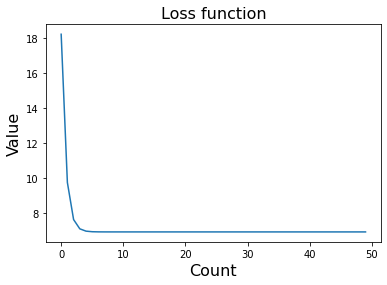

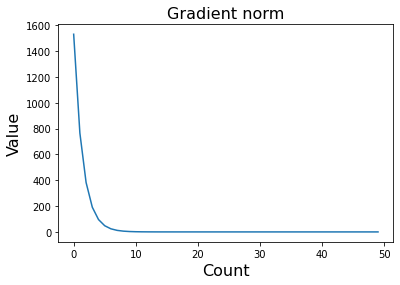

In [125]:
import matplotlib.pyplot as plt

# print(cost)

plt.plot(range(len(cost)), cost)
plt.title(f'Loss function', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.xlabel('Count', fontsize=16)
plt.show()

plt.plot(range(len(grad_norm)), grad_norm)
plt.title(f'Gradient norm', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.xlabel('Count', fontsize=16)
plt.show()

In [126]:
print(grad_norm[-1])

3.1481158018234842e-12


In [127]:
lm = LinearRegression()
lm.fit(X_train, y_train)
# lm.coef_
print(f'train score: {lm.score(X_train, y_train)}')
print(f'test score: {lm.score(X_test, y_test)}')

train score: 0.6589821735911321
test score: 0.6352015771388886
